In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import pylab as py
import import_ipynb

In [2]:
import Template as t

importing Jupyter notebook from Template.ipynb


In [3]:
df=t.load_data('csv')

Enter path of filehealth.csv


In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
t.overview(df,'head',7)

The shape is : (5110, 12)
The column data types are: 

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


The first 7 rows are :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [6]:
t.remove_cols(df,'id')

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
gender,0.0,0,3
age,0.0,0,104
hypertension,0.0,0,2
heart_disease,0.0,0,2
ever_married,0.0,0,2
work_type,0.0,0,5
Residence_type,0.0,0,2
avg_glucose_level,0.0,0,3979
bmi,4.0,201,418
smoking_status,0.0,0,4


#### Handling missing values


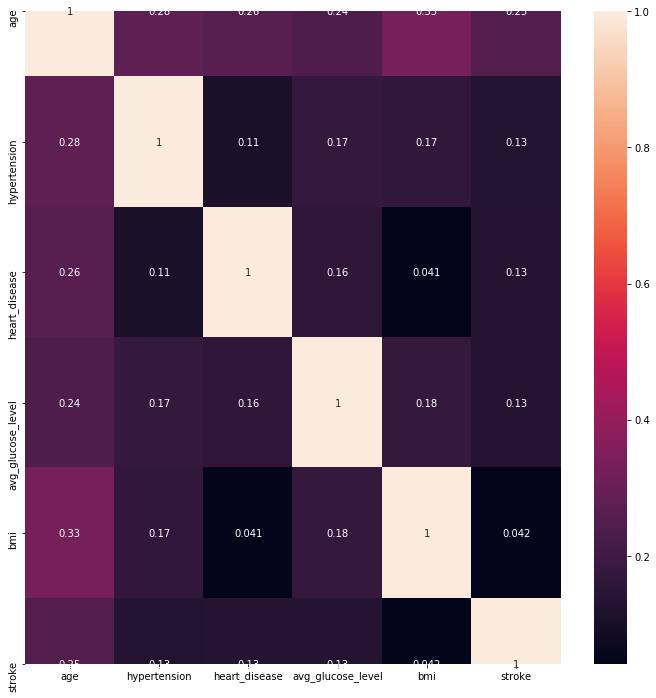

In [9]:
t.corr_heatmap(df)

Correlation of bmi with age is higher than any other variable

Enter number of number of neighbors5
Enter the number of columns to fit KNN imputer1
Enter name of columnage
x axis labelage
y axis labelbmi


E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


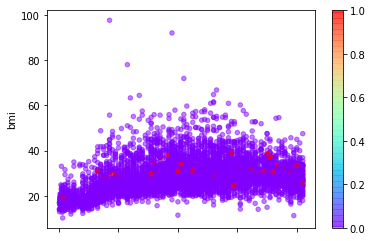

In [10]:
t.handle_mv(df,'bmi','KNN')

In [11]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
gender,0.0,0,3
age,0.0,0,104
hypertension,0.0,0,2
heart_disease,0.0,0,2
ever_married,0.0,0,2
work_type,0.0,0,5
Residence_type,0.0,0,2
avg_glucose_level,0.0,0,3979
bmi,0.0,0,474
smoking_status,0.0,0,4


In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.04,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Categorical Analysis

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


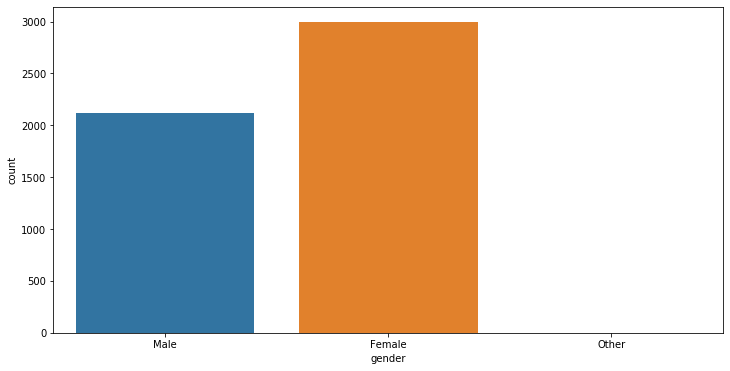

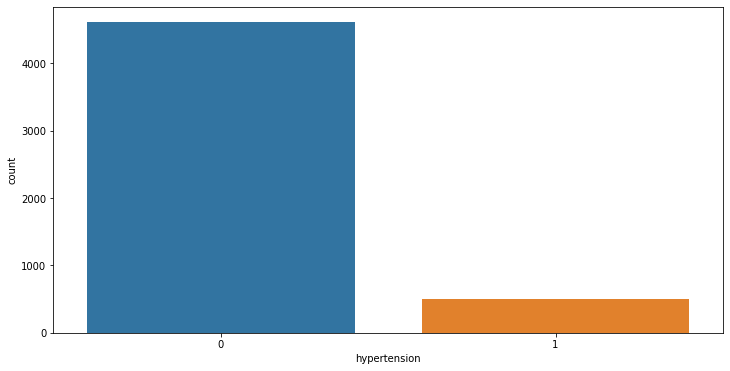

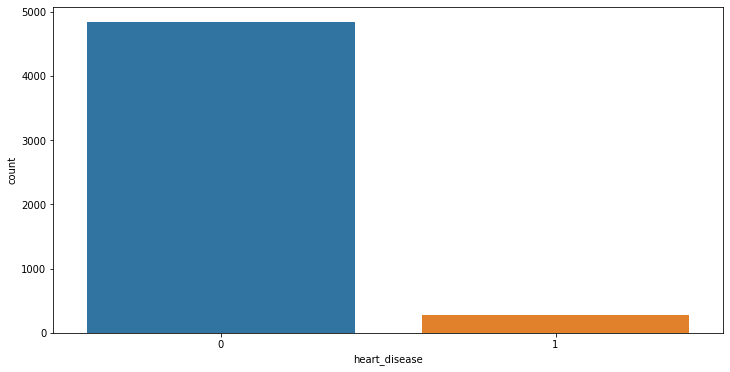

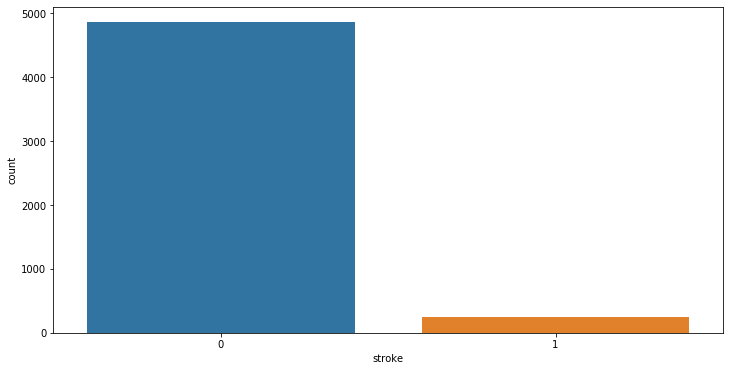

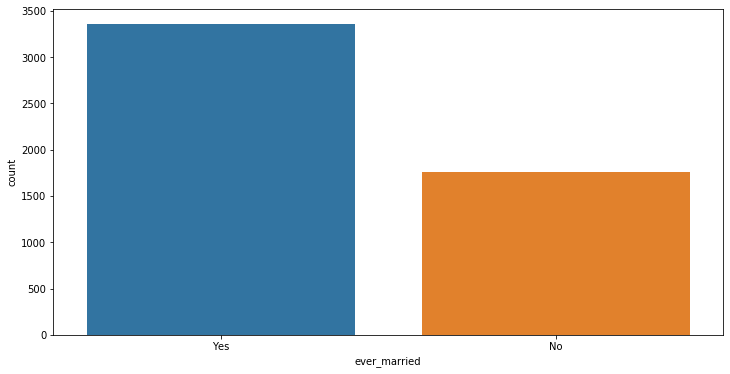

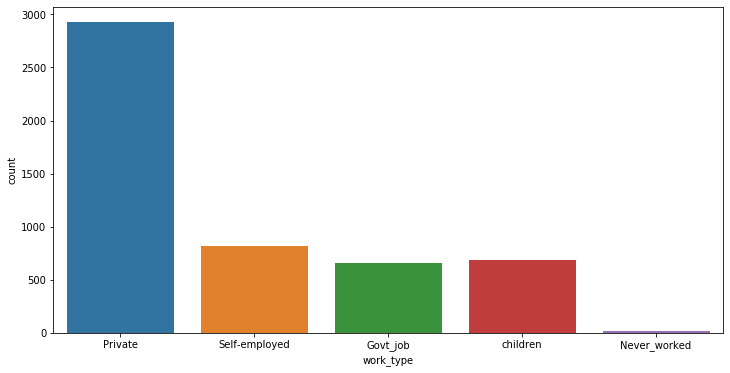

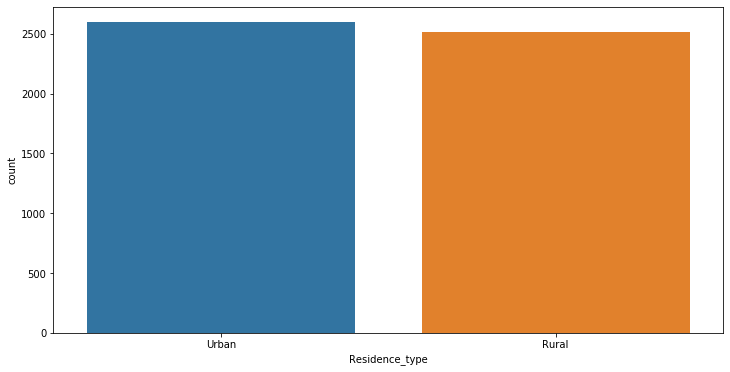

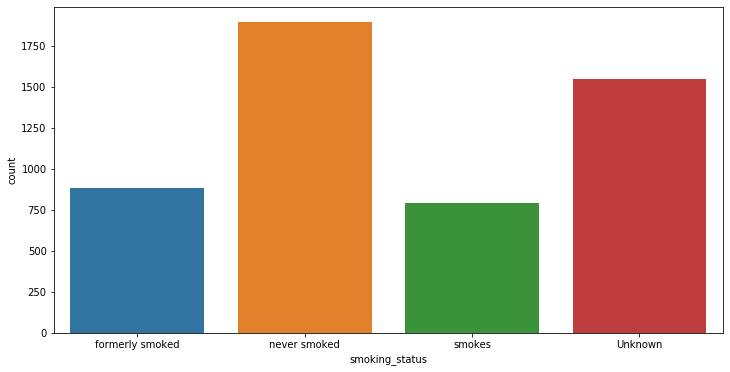

In [14]:
c=['gender','hypertension','heart_disease','stroke','ever_married','work_type','Residence_type','smoking_status']
for i in c:
    t.categorical_analysis(df,i)

#### Normality test

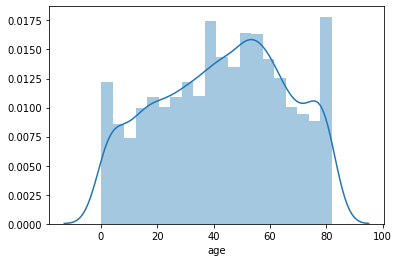

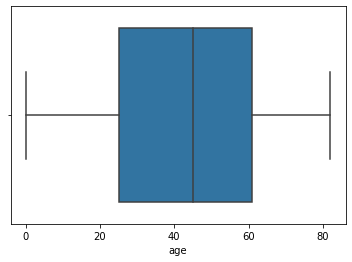

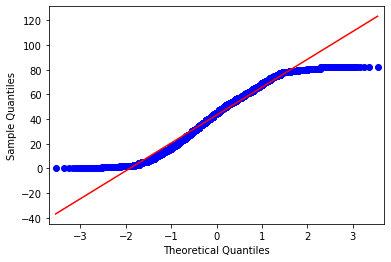

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Skew is -0.1370190866396024
Kurtosis is -0.9912147700517671
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.967,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=33.856
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=60434.854,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.051,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.964,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


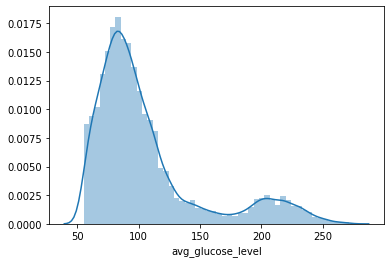

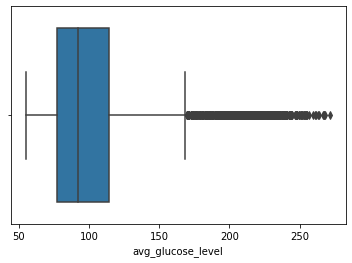

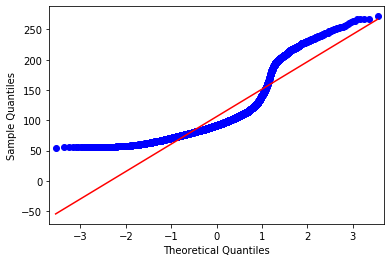

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Skew is 1.571822297397199
Kurtosis is 1.6776607484156187
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.806,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=352.086
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=98697.587,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.183,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to K

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


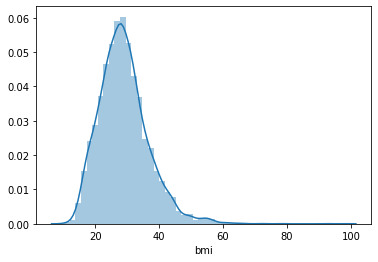

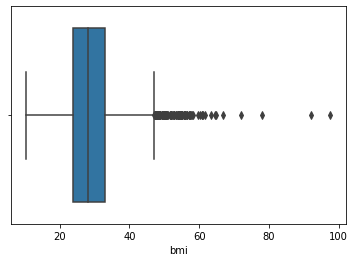

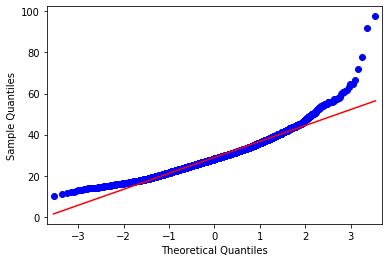

count    5110.000000
mean       28.936834
std         7.759025
min        10.300000
25%        23.700000
50%        28.200000
75%        33.040000
max        97.600000
Name: bmi, dtype: float64

Skew is 1.0346797080267225
Kurtosis is 3.409701719569929
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.955,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=30.571
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=10629.166,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.056,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
c=['age','avg_glucose_level','bmi']
for i in c:
    t.numerical_analysis(df,i)

None of the continous columns pass normality tests

#### Chi Square test

In [16]:
from scipy.stats import chi2_contingency
c=['gender','hypertension','heart_disease','stroke','ever_married','work_type','Residence_type','smoking_status']
for i in c:
    print(i)
    data=pd.crosstab(df[i],df['stroke'])
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print('\n')

gender
p value is 0.7895490538408245
Independent (H0 holds true)


hypertension
p value is 1.661621901511823e-19
Dependent (reject H0)


heart_disease
p value is 2.0887845685229236e-21
Dependent (reject H0)


stroke
p value is 0.0
Dependent (reject H0)


ever_married
p value is 1.6389021142314745e-14
Dependent (reject H0)


work_type
p value is 5.397707801896119e-10
Dependent (reject H0)


Residence_type
p value is 0.29833169286876987
Independent (H0 holds true)


smoking_status
p value is 2.0853997025008455e-06
Dependent (reject H0)




According to chi-square test gender and residence type do not have any relation with stroke

#### Handling non-normal behaviour of continous columns

Since data is left skewed therefore transforming the data using logarithmic transformation would be suitable

In [17]:
c=['age','avg_glucose_level','bmi']
df2=t.deep_copy(df)
for i in c:
    df2[i]=np.log(df2[i])


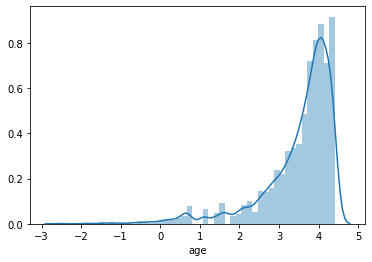

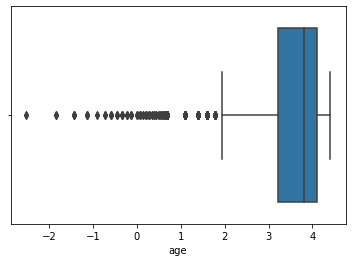

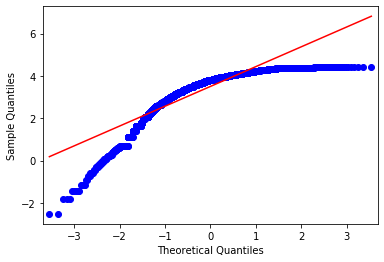

count    5110.000000
mean        3.502051
std         0.936616
min        -2.525729
25%         3.218876
50%         3.806662
75%         4.110874
max         4.406719
Name: age, dtype: float64

Skew is -2.1039385372000305
Kurtosis is 5.370582627398946
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.785,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=305.306
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=1279.783,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.167,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.908,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


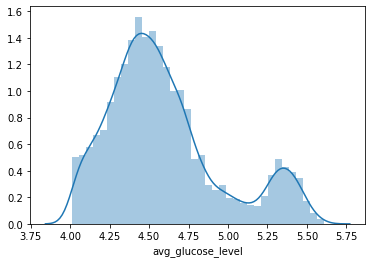

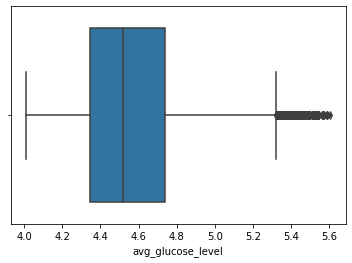

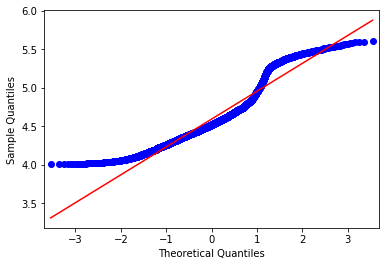

count    5110.000000
mean        4.592465
std         0.361985
min         4.009513
25%         4.346982
50%         4.520538
75%         4.736988
max         5.604846
Name: avg_glucose_level, dtype: float64

Skew is 0.8824919557054105
Kurtosis is 0.14686931211157805
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.924,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=125.131
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=145.771,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.103,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=1.000,p=0.000

Not normally distributed according to Kolmo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


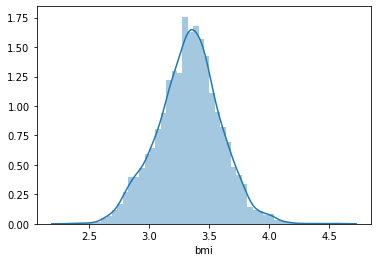

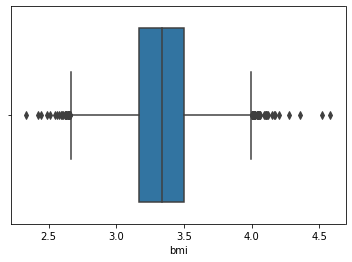

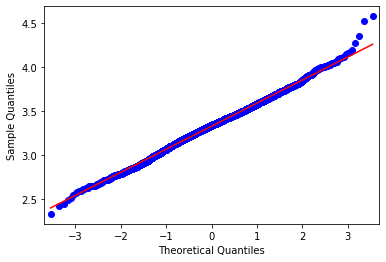

count    5110.000000
mean        3.330721
std         0.262385
min         2.332144
25%         3.165475
50%         3.339322
75%         3.497719
max         4.580877
Name: bmi, dtype: float64

Skew is -0.02879017368878422
Kurtosis is 0.27428587412303607
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.998,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=4.131
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=105.603,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.027,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.994,p=0.000

Not normally distributed according to Kolmo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
c=['age','avg_glucose_level','bmi']
for i in c:
    t.numerical_analysis(df2,i)

Log transformation has only improved the distribution of bmi. Rest of the columns were not improved

In [19]:
c=['age','avg_glucose_level','bmi']
df3=t.deep_copy(df)
from scipy.stats import yeojohnson
for i in c:
    df3[i],liam = yeojohnson(df3[i])

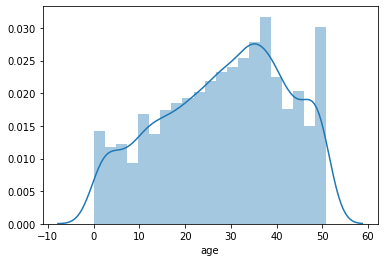

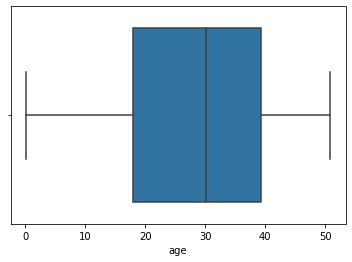

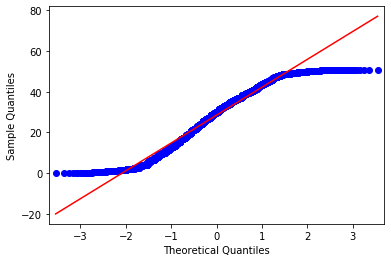

count    5110.000000
mean       28.529856
std        13.684204
min         0.079566
25%        18.004931
50%        30.149388
75%        39.315669
max        50.860697
Name: age, dtype: float64

Skew is -0.2787227895931489
Kurtosis is -0.8899089417344577
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.965,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=38.740
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=33533.231,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.062,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.962,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


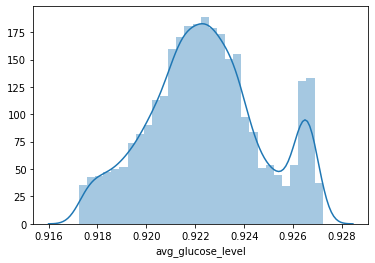

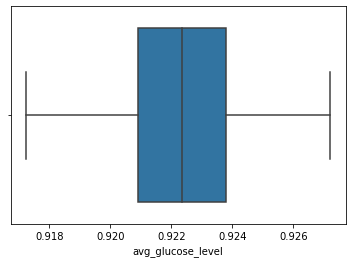

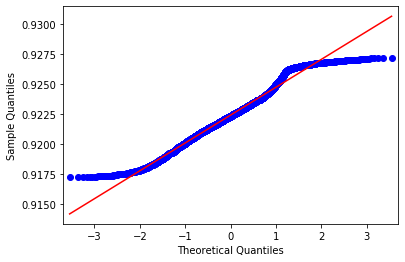

count    5110.000000
mean        0.922418
std         0.002330
min         0.917236
25%         0.920903
50%         0.922341
75%         0.923802
max         0.927208
Name: avg_glucose_level, dtype: float64

Skew is 0.0845487622279425
Kurtosis is -0.5005363330932755
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.981,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=17.883
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=0.030,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.052,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.820,p=0.000

Not normally distributed according to Kolmogor

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


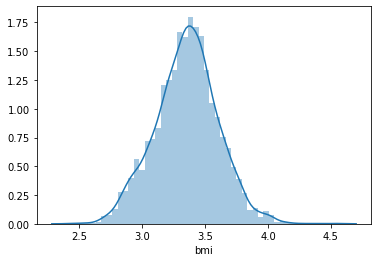

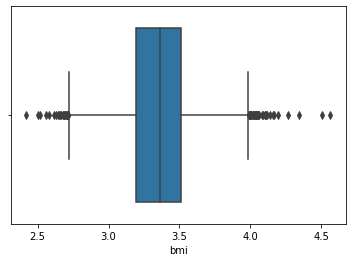

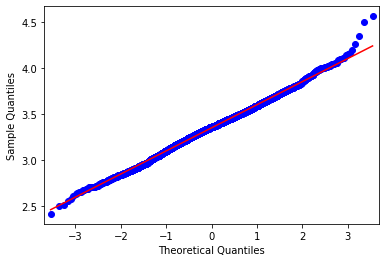

count    5110.000000
mean        3.352524
std         0.250827
min         2.417315
25%         3.193717
50%         3.359683
75%         3.511705
max         4.564280
Name: bmi, dtype: float64

Skew is -5.996949092324816e-05
Kurtosis is 0.27779259820375524
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.998,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=3.655
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=95.876,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.025,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.995,p=0.000

Not normally distributed according to Kolm

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
c=['age','avg_glucose_level','bmi']
for i in c:
    t.numerical_analysis(df3,i)

Yeo-Johnson Transformation is giving better results.

In [21]:
df2=t.deep_copy(df)

In [22]:
df2[['age','avg_glucose_level','bmi']]=df3[['age','avg_glucose_level','bmi']]

In [23]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,42.663301,0,1,Yes,Private,Urban,0.926756,3.610269,formerly smoked,1
1,Female,39.315669,0,0,Yes,Self-employed,Rural,0.926379,3.451692,never smoked,1
2,Male,49.780537,0,1,Yes,Private,Rural,0.923337,3.495858,never smoked,1
3,Female,32.477743,0,0,Yes,Private,Urban,0.925784,3.550528,smokes,1
4,Female,49.239063,1,0,Yes,Self-employed,Rural,0.925848,3.205691,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,49.780537,1,0,Yes,Private,Urban,0.921605,3.523858,never smoked,0
5106,Female,50.321078,0,0,Yes,Self-employed,Urban,0.924333,3.696030,never smoked,0
5107,Female,24.196721,0,0,Yes,Self-employed,Rural,0.921529,3.437986,never smoked,0
5108,Male,33.632054,0,0,Yes,Private,Rural,0.925668,3.267214,formerly smoked,0


#### Encoding

Since gender and residence do not have any relation according to chi square test therefore they will be encoded using label encoder.

In [24]:
df2=t.encode(df2,'gender','Residence_type')

Enter encode typelabel


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
df2.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,42.663301,0,1,Yes,Private,1,0.926756,3.610269,formerly smoked,1
1,0,39.315669,0,0,Yes,Self-employed,0,0.926379,3.451692,never smoked,1


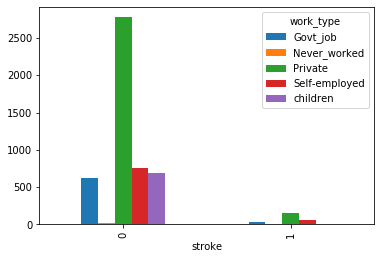

In [26]:
ct=pd.crosstab(df2['stroke'],df2['work_type'])
ct.plot.bar()

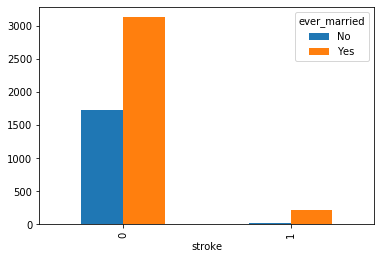

In [27]:
ct=pd.crosstab(df2['stroke'],df2['ever_married'])
ct.plot.bar()

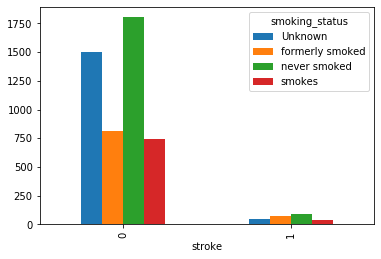

In [28]:
ct=pd.crosstab(df2['stroke'],df2['smoking_status'])
ct.plot.bar()

There is nothing conclusive about the effect of these columns on stroke. Therefore they will be labelled using label encoder 

In [29]:
df2=t.encode(df2,'work_type','ever_married','smoking_status')

Enter encode typelabel


In [30]:
df2.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

Fitting model using default parameters

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Accuracy  (%): 
 94.03131115459882
AUC  (%): 
 50.806451612903224
Precision: 
 100.0
Recall (%): 
 1.6129032258064515
f1 score (%): 
 3.1746031746031744
logistic loss :
 2.0615120940210883
KNN
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


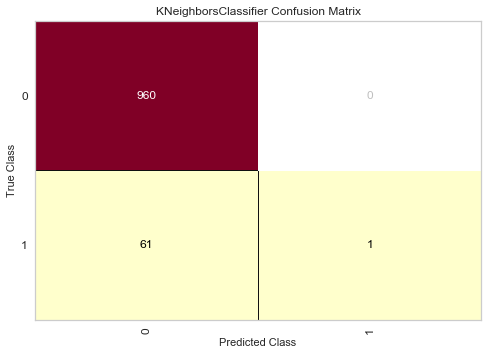

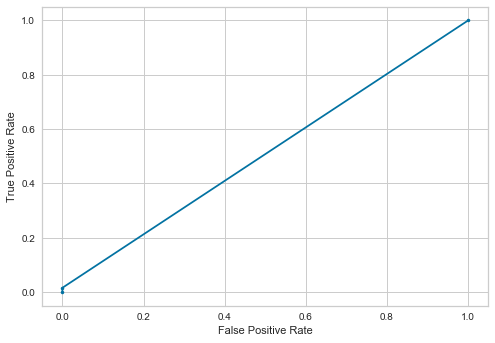

In [31]:
t.fit_model(df2,'stroke','KNN',classification=True)

Using one-hot encooding

In [32]:
df2=t.deep_copy(df)
df2[['age','avg_glucose_level','bmi']]=df3[['age','avg_glucose_level','bmi']]

In [33]:
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
df2=t.encode(df2,'gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status')

Enter encode typeone-hot


Accuracy  (%): 
 94.03131115459882
AUC  (%): 
 51.560819892473106
Precision: 
 66.66666666666666
Recall (%): 
 3.225806451612903
f1 score (%): 
 6.153846153846154
logistic loss :
 2.0615128764060495
KNN
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.67      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.80      0.52      0.52      1022
weighted avg       0.92      0.94      0.91      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


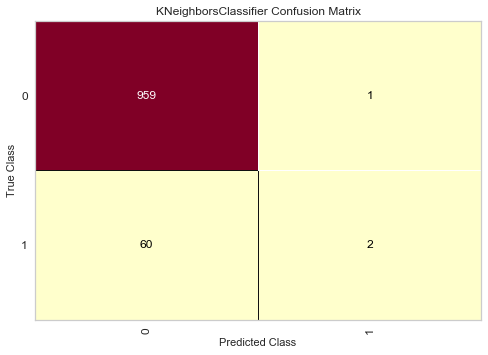

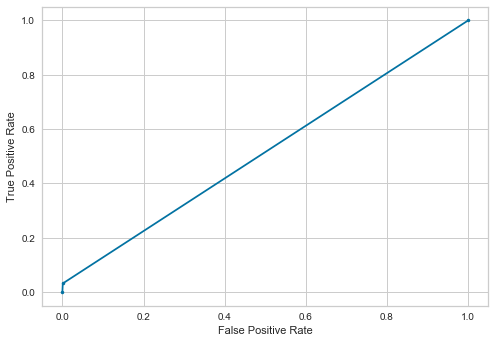

In [35]:
t.fit_model(df2,'stroke','KNN',classification=True)


#### Over-sampling data

Accuracy  (%): 
 86.0078277886497
AUC  (%): 
 63.88608870967742
Precision: 
 18.6046511627907
Recall (%): 
 38.70967741935484
f1 score (%): 
 25.13089005235602
logistic loss :
 4.832807223290018
KNN
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.19      0.39      0.25        62

    accuracy                           0.86      1022
   macro avg       0.57      0.64      0.59      1022
weighted avg       0.91      0.86      0.88      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


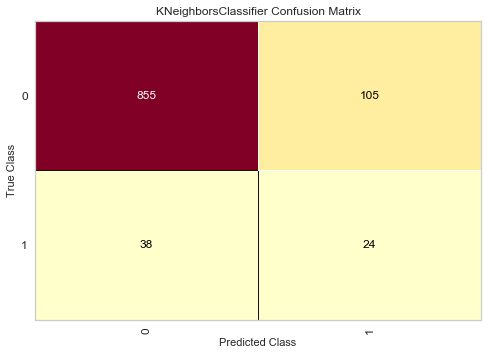

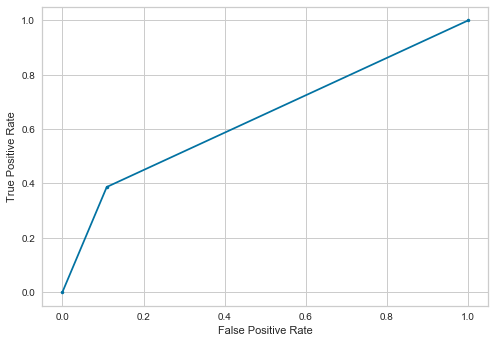

In [36]:
t.fit_oversample_model(df2,'stroke','KNN',classification=True)

Over-sampling has slightly improved performance 

#### Changing number of neighbors


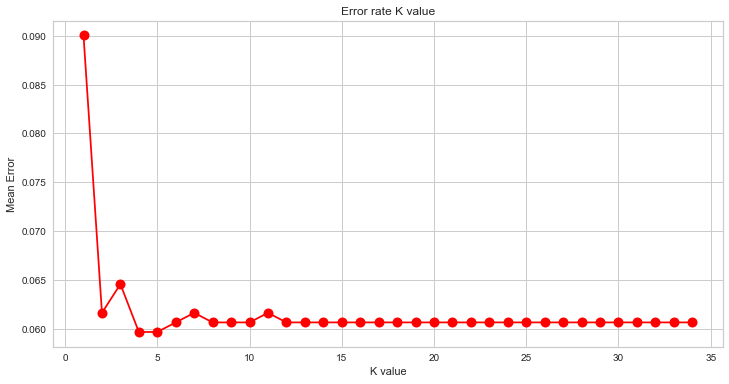

In [37]:
t.knn_plot(df2,'stroke',classification=True,over_sample=False)

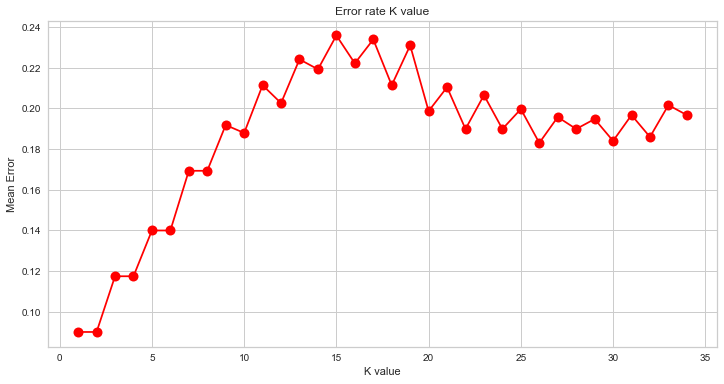

In [39]:
t.knn_plot(df2,'stroke',classification=True,over_sample=True)

Accuracy  (%): 
 86.0078277886497
AUC  (%): 
 63.88608870967742
Precision: 
 18.6046511627907
Recall (%): 
 38.70967741935484
f1 score (%): 
 25.13089005235602
logistic loss :
 4.832807223290018
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.19      0.39      0.25        62

    accuracy                           0.86      1022
   macro avg       0.57      0.64      0.59      1022
weighted avg       0.91      0.86      0.88      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


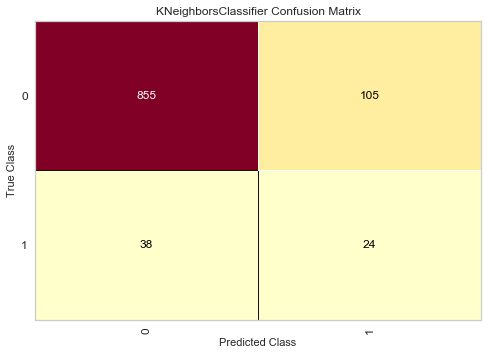

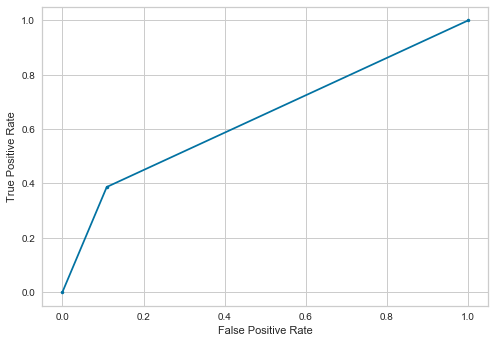

In [44]:
t.knn_with_n(df2,'stroke',n=5,classification=True,over_sample=True)

Accuracy  (%): 
 80.82191780821918
AUC  (%): 
 67.1606182795699
Precision: 
 16.161616161616163
Recall (%): 
 51.61290322580645
f1 score (%): 
 24.615384615384613
logistic loss :
 6.624004800954898
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       960
           1       0.16      0.52      0.25        62

    accuracy                           0.81      1022
   macro avg       0.56      0.67      0.57      1022
weighted avg       0.91      0.81      0.85      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


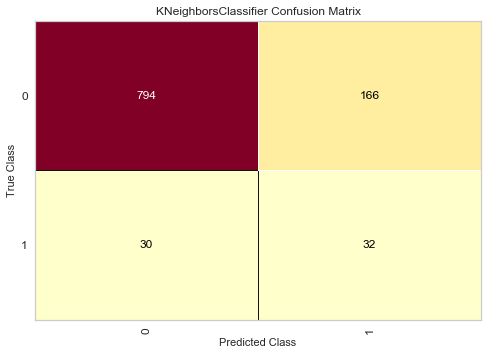

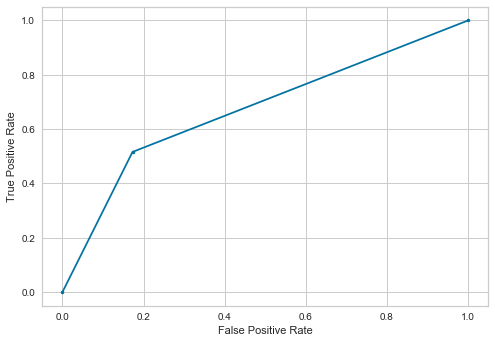

In [50]:
t.knn_with_n(df2,'stroke',n=9,classification=True,over_sample=True)

#### Changing sampling strategy

Accuracy  (%): 
 83.07240704500978
AUC  (%): 
 64.58669354838709
Precision: 
 16.363636363636363
Recall (%): 
 43.54838709677419
f1 score (%): 
 23.788546255506606
logistic loss :
 5.8466914488893496
              precision    recall  f1-score   support

           0       0.96      0.86      0.90       960
           1       0.16      0.44      0.24        62

    accuracy                           0.83      1022
   macro avg       0.56      0.65      0.57      1022
weighted avg       0.91      0.83      0.86      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


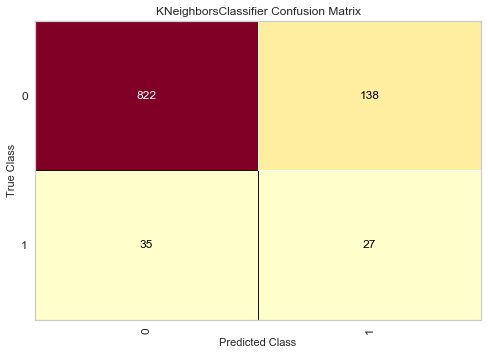

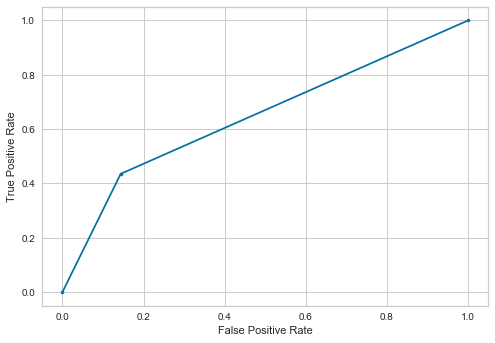

In [46]:
t.knn_with_n(df2,'stroke',n=7,classification=True,over_sample=True,sampling_strategy='minority')

Accuracy  (%): 
 80.82191780821918
AUC  (%): 
 67.1606182795699
Precision: 
 16.161616161616163
Recall (%): 
 51.61290322580645
f1 score (%): 
 24.615384615384613
logistic loss :
 6.624004800954898
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       960
           1       0.16      0.52      0.25        62

    accuracy                           0.81      1022
   macro avg       0.56      0.67      0.57      1022
weighted avg       0.91      0.81      0.85      1022



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


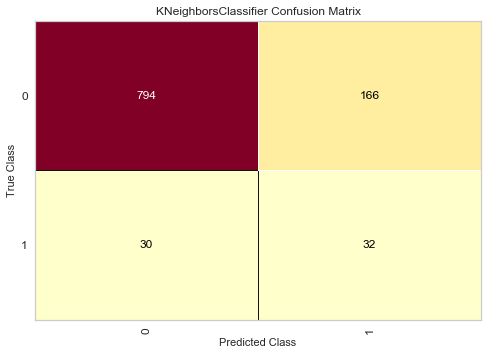

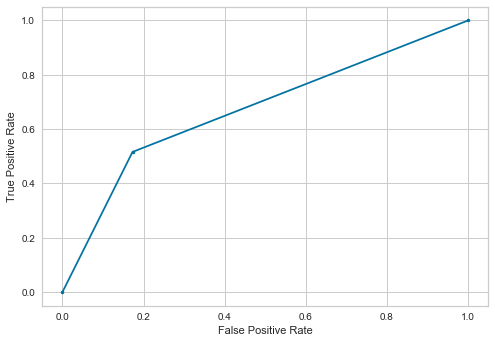

In [51]:
t.knn_with_n(df2,'stroke',n=9,classification=True,over_sample=True,sampling_strategy='minority')

These are the best results that can be achieved on this dataset using KNN classifier